In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

### msft.csv: This file contains the stock prices for Microsoft from January 2007 to December 2016.

### train office.csv and test office.csv: This dataset contains information about the date, temperature, humidity, and other environmental factors for the office. The goal is to predict whether the office room is occupied (1) or not (0). Use the last column, Occupancy, as your target (class) variable.

### 1 . [35 points] Different predictive models

### (a) Train the following classifiers (using 5-fold cross-validation) on the train office.csv file and calculate the average accuracy of the cross-validation for each method given below. Vary the hyperparameters of the classifier and draw a plot that shows the average cross-validation accuracy versus hyperparameter values for each classification method shown below:

In [2]:
data = pd.read_csv('train_office.csv')
data = data.drop('date', axis=1)
X = data.drop('Occupancy', axis=1)
Y = data['Occupancy']
display(data.head(2))
display(X.head(2))

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1


,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783


### i. Decision tree (DT) (maxdepth = 1, 5, 10, 50, 100)

In [3]:
def dt(data):
    depths = [1, 5, 10, 50, 100]
    results = []
    for d in depths:
        clf = tree.DecisionTreeClassifier(max_depth=d)
        scores = cross_val_score(clf, X, Y, cv=5)
        mean_score = scores.mean()
        results.append((d, mean_score)) 
    res_df = pd.DataFrame(results, columns=['Depth', 'Avg_Cross_Acc'])
    return res_df

dt_res = dt(data)
dt_res

,Depth,Avg_Cross_Acc
0,1,0.975499
1,5,0.938876
2,10,0.920224
3,50,0.922810
4,100,0.920496


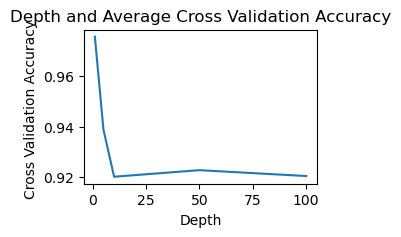

In [4]:
plt.figure(figsize = (3,2))
sns.lineplot(data=dt_res, x='Depth', y='Avg_Cross_Acc')
plt.title('Depth and Average Cross Validation Accuracy')
plt.xlabel('Depth')
plt.ylabel('Cross Validation Accuracy ')
plt.show()

### ii. K-nearest neighbor (KNN) (k = 1, 2, 3, 4, 5, 10, 15)

In [5]:
def kn(data):
    kneighbors = [1, 2, 3, 4, 5, 10, 15]
    results = []
    for k in kneighbors:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X, Y, cv=5)
        mean_score = scores.mean()
        results.append((k, mean_score)) 
    res_df = pd.DataFrame(results, columns=['K-Value', 'Avg_Cross_Acc'])
    return res_df

knn_res = kn(data)
knn_res

/Users/svinayachanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/svinayachanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

,K-Value,Avg_Cross_Acc
0,1,0.936697
1,2,0.944049
2,3,0.943641
3,4,0.945411
4,5,0.947997
5,10,0.951265
6,15,0.961476


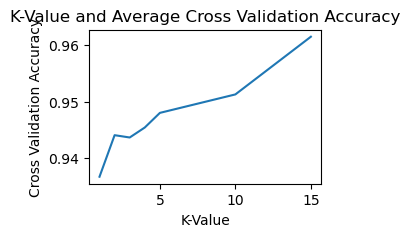

In [6]:
plt.figure(figsize=(3,2))
sns.lineplot(data=knn_res, x='K-Value', y='Avg_Cross_Acc')
plt.title('K-Value and Average Cross Validation Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Cross Validation Accuracy')
plt.show()

### iii. Logistic regression (LR) (C = 0.001, 0.01, 0.1, 0.5, 1)

In [7]:
def lr(data):
    c_val = [0.001, 0.01, 0.1, 0.5, 1]
    results = []
    for cv in c_val:
        clf = LogisticRegression(C=cv)
        scores = cross_val_score(clf, X, Y, cv=5)
        mean_score = scores.mean()
        results.append((cv, mean_score)) 
    res_df = pd.DataFrame(results, columns=['C-Value', 'Avg_Cross_Acc'])
    return res_df

lr_res = lr(data)
lr_res

,C-Value,Avg_Cross_Acc
0,0.001,0.984757
1,0.010,0.983940
2,0.100,0.981898
3,0.500,0.985438
4,1.000,0.981081


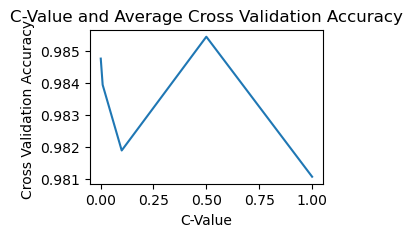

In [8]:
plt.figure(figsize=(3,2))
sns.lineplot(data=lr_res, x='C-Value', y='Avg_Cross_Acc')
plt.title('C-Value and Average Cross Validation Accuracy')
plt.xlabel('C-Value')
plt.ylabel('Cross Validation Accuracy ')
plt.show()

### (b) Use the plot to choose the hyperparameter with the highest average accuracy.

In [9]:
Decision_Tree = dt_res.sort_values(by='Avg_Cross_Acc', ascending=False)
Decision_Tree.head(1)

,Depth,Avg_Cross_Acc
0,1,0.975499


In [10]:
K_Neighbour = knn_res.sort_values(by='Avg_Cross_Acc', ascending=False)
K_Neighbour.head(1)

,K-Value,Avg_Cross_Acc
6,15,0.961476


In [11]:
Logistic_Regression = lr_res.sort_values(by='Avg_Cross_Acc', ascending=False)
Logistic_Regression.head(1)

,C-Value,Avg_Cross_Acc
3,0.5,0.985438


As we can see from the above result that Decision Tree gets highest Average Accuracy with Depth 1, K_Neighbour gets highest Average Accuracy with K-Value 15, Logistic Regression gets highest Average Accuracy with C-Value 0.5. 

### (c) For each method above, train a model on the entire train office.csv set with the hyperparameter you had chosen from the previous step.

In [12]:
dt_clf = tree.DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=1)

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X, Y)

KNeighborsClassifier(n_neighbors=15)

In [14]:
lr_clf = LogisticRegression(C=0.5)
lr_clf.fit(X, Y)

LogisticRegression(C=0.5)

### (d) Predict labels of test samples in the test office.csv using the best classifiers you built in the previous step. Then, perform the followings:

In [15]:
data_test = pd.read_csv('test_office.csv')
data_test = data_test.drop('date', axis=1)
X_T = data_test.drop('Occupancy', axis=1)
Y_T = data_test['Occupancy']
data_test.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.00,27.200,0.0,681.5,0.004728,0
1,22.79,27.445,0.0,689.0,0.004710,0


### i. Print out the confusion matrices (for DT, KNN, and LR).

In [16]:
dt_clf = tree.DecisionTreeClassifier(max_depth=1) 
dt_clf.fit(X, Y)
DT_Y_pred = dt_clf.predict(X_T)
DT_Y_pred_prob = dt_clf.predict_proba(X_T)
DT_confusion_matrix = confusion_matrix(Y_T, DT_Y_pred)
DT_precision = precision_score(Y_T, DT_Y_pred)
DT_recall = recall_score(Y_T, DT_Y_pred)
DT_f1_score = f1_score(Y_T, DT_Y_pred, average='weighted')
DT_df = pd.DataFrame({'Model': ['Decision Tree'],'Precision-Score': [DT_precision],'Recall-Score': [DT_recall],'F1-Score': [DT_f1_score]})
DT_confusion_matrix

array([[641,   6],
       [  1, 149]])

In [17]:
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X, Y)
KNN_Y_pred = knn_clf.predict(X_T)
KNN_Y_pred_prob = knn_clf.predict_proba(X_T)
KNN_confusion_matrix = confusion_matrix(Y_T, KNN_Y_pred)
KNN_precision = precision_score(Y_T, KNN_Y_pred)
KNN_recall = recall_score(Y_T, KNN_Y_pred)
KNN_f1_score = f1_score(Y_T, KNN_Y_pred, average='weighted')
KNN_df = pd.DataFrame({'Model': ['KNN'],'Precision-Score': [KNN_precision],'Recall-Score': [KNN_recall],'F1-Score': [KNN_f1_score]})
KNN_confusion_matrix

/Users/svinayachanta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[641,   6],
       [  1, 149]])

In [18]:
lr_clf = LogisticRegression(C=0.5) 
lr_clf.fit(X, Y)
LR_Y_pred = lr_clf.predict(X_T)
LR_Y_pred_prob = lr_clf.predict_proba(X_T)
LR_confusion_matrix = confusion_matrix(Y_T, LR_Y_pred)
LR_precision = precision_score(Y_T, LR_Y_pred)
LR_recall = recall_score(Y_T, LR_Y_pred)
LR_f1_score = f1_score(Y_T, LR_Y_pred, average='weighted')
LR_df = pd.DataFrame({'Model': ['Logistic Regression'],'Precision-Score': [LR_precision],'Recall-Score': [LR_recall],'F1-Score': [LR_f1_score]})
LR_confusion_matrix

array([[641,   6],
       [  0, 150]])

### ii. Draw a bar plot showing precision, recall, F1-score of the three classifiers. For the F1-score, you can use ‘weighted’.

In [19]:
SCORES_df = pd.concat([DT_df, KNN_df, LR_df], axis=0)
SCORES_df

,Model,Precision-Score,Recall-Score,F1-Score
0,Decision Tree,0.961290,0.993333,0.991272
0,KNN,0.961290,0.993333,0.991272
0,Logistic Regression,0.961538,1.000000,0.992528


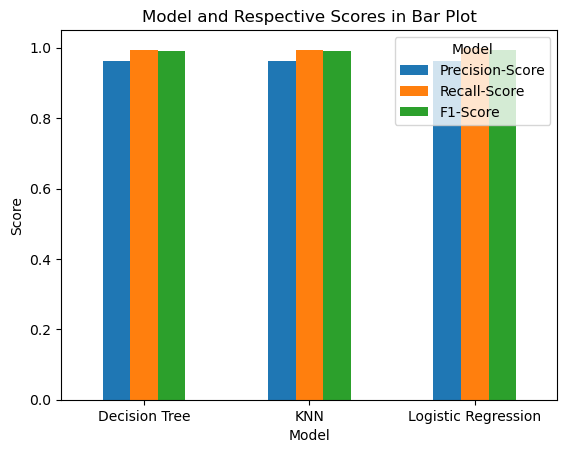

In [20]:
SCORES_df = SCORES_df.set_index('Model')
ax = SCORES_df.plot(kind='bar')
ax.set(xlabel="Model", ylabel="Score")
ax.set_title('Model and Respective Scores in Bar Plot')
plt.legend(title='Model')
plt.xticks(rotation=360)
plt.show()

### iii. Draw ROC curves of the three classifiers in one graph. In the legend of the graph, include AUCs (area under the curve), e.g., DT (AUC=X), KNN (AUC=X), LR (AUC=X).

In [21]:
DT_fpr, DT_tpr, DT_thresholds = roc_curve(Y_T, DT_Y_pred_prob[:,1]) 
DT_roc_auc = auc(DT_fpr, DT_tpr)
print(DT_roc_auc)
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(Y_T, KNN_Y_pred_prob[:,1]) 
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
print(KNN_roc_auc)
LR_fpr, LR_tpr, LR_thresholds = roc_curve(Y_T, LR_Y_pred_prob[:,1]) 
LR_roc_auc = auc(LR_fpr, LR_tpr)
print(LR_roc_auc)

0.9920298815043791
0.9995002575991756
0.9974652241112828


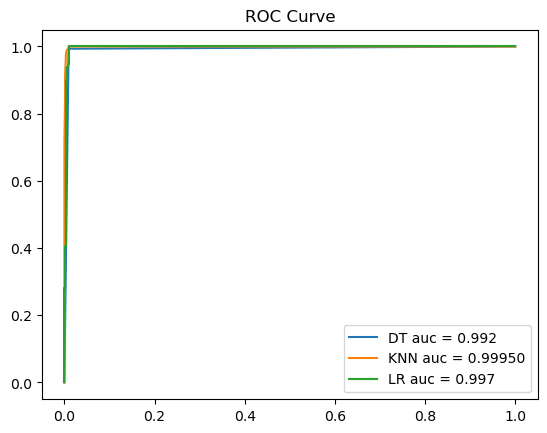

In [22]:
plt.plot(DT_fpr, DT_tpr, label='DT auc = {:.3f}'.format(DT_roc_auc))
plt.plot(KNN_fpr, KNN_tpr, label='KNN auc = {:.5f}'.format(KNN_roc_auc))
plt.plot(LR_fpr, LR_tpr, label='LR auc = {:.3f}'.format(LR_roc_auc))
plt.title('ROC Curve')
plt.legend()
plt.show()

### (e) Visualize (plot) the resulting decision tree You need to use tree class from sklearn–See this. Based on this tree, what do you think is the most important feature?

[Text(0.5, 0.75, 'Light <= 365.125\ngini = 0.337\nsamples = 7346\nvalue = [5767, 1579]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.003\nsamples = 5691\nvalue = [5683, 8]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.096\nsamples = 1655\nvalue = [84, 1571]\nclass = 1')]

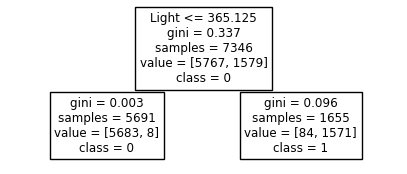

In [23]:
data = pd.read_csv('train_office.csv')
data = data.drop('date', axis = 1)
X = data.drop('Occupancy', axis = 1)
Y = data['Occupancy']
dt_clf = tree.DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X, Y)
plt.figure(figsize=(5, 2))
tree.plot_tree(dt_clf, feature_names=X.columns, class_names=["0", "1"])

Based on this tree we can say that Light is the most important feature.

### 2. [20 points] Sklearn grid search

### Sickit-learn provides a function to perform grid search i.e., evaluating all possible values of a given set of hyperparameters. For this question, use the office dataset.

### (a) Perform a grid search for Random Forest Classifier using a 5-fold cross-validation (cv=5). The hyperparameters for your grid search are {n estimators, criterion, max depth, min samples split, min samples leaf}. Please read the signature of Random Forest to know more about these arguments and their appropriate values.

In [24]:
params = {'n_estimators': [50, 100, 150],'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [3, 4, 5],'min_samples_leaf': [2, 4, 5, 6]}
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf, param_grid=params, cv=5)
grid_search.fit(X, Y)
bp = grid_search.best_params_
bp

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 100}

### (b) Predict the class of test samples using the best classifier. Note that, the best classifier is built similar to 1(c) i.e., training on the entire training data with the best hyperparameters. Then, predict labels of test samples and print accuracy, precision, recall, F1-score, and AUC. Did you obtain a better performing classifier than what you found in question 1?

In [25]:
data_test = pd.read_csv('test_office.csv')
data_test = data_test.drop('date', axis = 1)
X_T = data_test.drop('Occupancy', axis = 1)
Y_T = data_test['Occupancy']
rf_clf = RandomForestClassifier(**bp)
rf_clf.fit(X, Y)
RF_Y_pred = rf_clf.predict(X_T)
RF_Y_pred_prob = rf_clf.predict_proba(X_T)
RF_confusion_matrix = confusion_matrix(Y_T, RF_Y_pred)
RF_accuracy = accuracy_score(Y_T, RF_Y_pred)
RF_precision = precision_score(Y_T, RF_Y_pred)
RF_recall = recall_score(Y_T, RF_Y_pred)
RF_f1_score = f1_score(Y_T, RF_Y_pred, average='weighted')
RF_auc_score = roc_auc_score(Y_T, RF_Y_pred_prob[:, 1])
RF_df = pd.DataFrame({'Model': ['Random Forest'],'Precision-Score': [RF_precision],'Recall-Score': [RF_recall],'F1-Score': [RF_f1_score], 'Accuracy-Score': [RF_accuracy], 'AUC-Score': [RF_auc_score]})
RF_df

,Model,Precision-Score,Recall-Score,F1-Score,Accuracy-Score,AUC-Score
0,Random Forest,0.980132,0.986667,0.993734,0.993726,0.99948


Apparently, Random forest classifier is performing similar to Decision Tree, Logistic Regression and KNN with the best parameters achieved from Grid Search.

### 3. [45 points] Regression

### For this question, use the Microsoft stock dataset. Use 80% of the data for training and 20% for the test. Consider Adj Close as the label.

### (a) Use grid search (5-fold cross-validation) and find the best decision tree regressor. The hyperparameters for your grid search include {criterion, splitter, max depth, min samples split, min samples leaf}. Again, consider a set of reasonable values for hyperparamters.

In [26]:
msft = pd.read_csv('msft.csv')
msft = msft.drop('Date', axis = 1)
display(msft.head(2))
X_m = msft.drop('Adj Close', axis=1)
Y_m = msft['Adj Close']
display(X_m.head(2))

,Open,High,Low,Close,Volume,Adj Close
0,62.959999,62.990002,62.029999,62.139999,25465900,62.139999
1,62.860001,63.200001,62.730000,62.900002,10181600,62.900002


,Open,High,Low,Close,Volume
0,62.959999,62.990002,62.029999,62.139999,25465900
1,62.860001,63.200001,62.730000,62.900002,10181600


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)
params = {'criterion': ['squared_error', 'friedman_mse'],'max_depth': [3, 5, 7, None], 'splitter': ['best', 'random'],'min_samples_split': [3, 5, 7, 10],'min_samples_leaf': [3, 4, 5, 7]}
dtr_clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr_clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
bp = grid_search.best_params_
bp

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

### (b) Find the hyperparameter values yielding the best performance in the previous step. Then, similar to the previous questions, train a decision tree regressor with these hyperparameters on the entire training set. Afterwards, predict labels of samples in the test set using this best regressor. What is the performance against the test set based on RMSE?

In [28]:
dtr_clf = DecisionTreeRegressor(**bp)
dtr_clf.fit(X_train, y_train)
y_pred = dtr_clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.945893885892023

### (c) Draw the learning curve plot, i.e., the size of the training set vs. the performance. For each experiment, train a classifier on k% of the training set and get the performance on the training and test sets and draw them in one plot. Consider k={10%, 20%, 30% · · · 100%}. What are your observations?

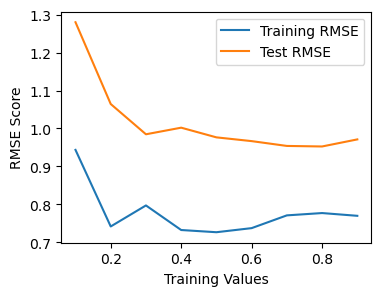

In [29]:
train_k = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
train_s = []
test_s = []
for i in train_k:
    X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, train_size=i)
    dtr_clf = DecisionTreeRegressor(**bp)
    dtr_clf.fit(X_train, y_train)
    y_train_pred = dtr_clf.predict(X_train)
    train_s.append(mean_squared_error(y_train, y_train_pred, squared=False))
    y_test_pred = dtr_clf.predict(X_test)
    test_s.append(mean_squared_error(y_test, y_test_pred, squared=False))
plt.figure(figsize = (4,3))
plt.plot(train_k, train_s, label='Training RMSE')
plt.plot(train_k, test_s, label='Test RMSE')
plt.xlabel('Training Values')
plt.ylabel('RMSE Score')
plt.legend()
plt.show()

The RMSE value is decresing for test data as we take more training data. Hence 0.75 would be an ideal training data to get good RMSE for this dataset.

### (d) Traditional models (e.g., decision trees) are usually sensitive to the input features’ scale. Hence, it may be better to change raw feature vectors into a more suitable representation for the downstream task. In this part, try to apply different transformations to the input features aiming to have a better predictive model. To this end, use preprocessing package (study this page and sample codes carefully).

In [30]:
msft = pd.read_csv('msft.csv') #without applying StandardScaler, MinMaxScaler, Normalize functions
msft = msft.drop('Date', axis = 1)
X_m = msft.drop('Adj Close', axis=1)
Y_m = msft['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)
params = {'criterion': ['squared_error', 'friedman_mse'],'max_depth': [3, 5, 7, None], 'splitter': ['best', 'random'],'min_samples_split': [3, 5, 7, 10],'min_samples_leaf': [3, 4, 5, 7]}
dtr_clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr_clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
bp = grid_search.best_params_
bp

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [31]:
dtr_clf = DecisionTreeRegressor(**bp)
dtr_clf.fit(X_train, y_train)
y_pred = dtr_clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.945893885892023

### i. Transform the input features using StandardScaler function and repeat 3(a) and 3(b).

In [32]:
msft = pd.read_csv('msft.csv')
msft = msft.drop('Date', axis = 1)
X_m = msft.drop('Adj Close', axis=1)
Y_m = msft['Adj Close']
scaler = StandardScaler()
X_m = scaler.fit_transform(X_m)
X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)
params = {'criterion': ['squared_error', 'friedman_mse'],'max_depth': [3, 5, 7, None], 'splitter': ['best', 'random'],'min_samples_split': [3, 5, 7, 10],'min_samples_leaf': [3, 4, 5, 7]}
dtr_clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr_clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
bp = grid_search.best_params_
bp

{'criterion': 'squared_error',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'splitter': 'best'}

In [33]:
dtr_clf = DecisionTreeRegressor(**bp)
dtr_clf.fit(X_train, y_train)
y_pred = dtr_clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.9453411545391117

### ii. Transform the input features using MinMaxScaler function and repeat 3(a) and 3(b).

In [34]:
msft = pd.read_csv('msft.csv')
msft = msft.drop('Date', axis = 1)
X_m = msft.drop('Adj Close', axis=1)
Y_m = msft['Adj Close']
scaler = MinMaxScaler()
X_m = scaler.fit_transform(X_m)
X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)
params = {'criterion': ['squared_error', 'friedman_mse'],'max_depth': [3, 5, 7, None], 'splitter': ['best', 'random'],'min_samples_split': [3, 5, 7, 10],'min_samples_leaf': [3, 4, 5, 7]}
dtr_clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr_clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
bp = grid_search.best_params_
bp

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'best'}

In [35]:
dtr_clf = DecisionTreeRegressor(**bp)
dtr_clf.fit(X_train, y_train)
y_pred = dtr_clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.9451533971538901

### iii. Transform the input features using normalize function (section 6.3.3) and repeat 3(a) and 3(b).

In [36]:
msft = pd.read_csv('msft.csv')
msft = msft.drop('Date', axis = 1)
X_m = msft.drop('Adj Close', axis=1)
X_m = normalize(X_m)
Y_m = msft['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=0)

In [37]:
params = {'criterion': ['squared_error', 'friedman_mse'],'max_depth': [3, 5, 7, None], 'splitter': ['best', 'random'],'min_samples_split': [3, 5, 7, 10],'min_samples_leaf': [3, 4, 5, 7]}
dtr_clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=dtr_clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
bp = grid_search.best_params_
bp

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'random'}

In [38]:
dtr_clf = DecisionTreeRegressor(**bp)
dtr_clf.fit(X_train, y_train)
y_pred = dtr_clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

5.448155654022808

### Did any of the processing techniques help?

No, Applying StandardScaler, MinMaxScaler, Normalize functions on Microsoft stock dataset does not make a huge difference and do no make it a better predictive model. The RMSE is almost similar and the RMSE is better without using StandardScaler, MinMaxScaler. Normalize functions increased the RMSE a lot.